In [1]:
import pandas as pd

In [2]:
from pandas import ExcelWriter
from pandas import ExcelFile

In [3]:
pd.read_csv('E:\python assignment new.csv')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
tips = pd.read_csv('E:\python assignment new.csv')

In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [7]:
sum(tips.tip,tips.size)

2439.579999999999

 ## Ques:1 What is overall average tip ##

In [8]:
tips.tip.mean()

2.9982786885245902

## Ques:2 Get a numerical summary for 'tip' - are the median and mean very different? What does this tell you about the field? ##

In [9]:
tips.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

 ## tip feild dosent have any outliers because the mean and median dont have any huge difference. ##

 ## Ques:3 Prepare a boxplot for 'tip', are there any outliers? ##

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline


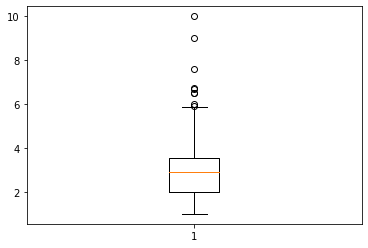

In [11]:
plt.boxplot(x=tips['tip'])
plt.show()

In [12]:
tips[tips.tip>=8]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3
212,48.33,9.0,Male,No,Sat,Dinner,4


## so here tip contain an outliers ##

 ## Ques:4 Prepare a boxplot for 'total_bill', are there any outliers? ##

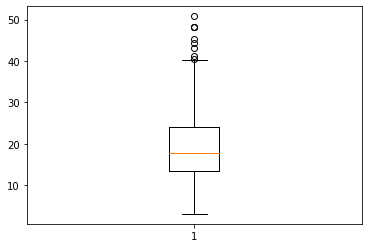

In [14]:
plt.boxplot(x=tips['total_bill'])
plt.show()

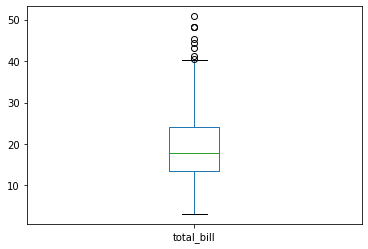

In [15]:
tips.total_bill.plot.box()
plt.show()

## Yes, total_bill field contains Outliers ##

 ## Ques:5 Gender: what is the percent of females in the data? ##

In [16]:
tips.sex.value_counts(normalize = True)

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

## Hence the percentage of females are 35.65% ##

## Ques:6 Prepare a bar plot with the bars representing the percentage of records for each gender ##

In [17]:
freqs = tips.sex.value_counts(normalize = True )
freqs

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

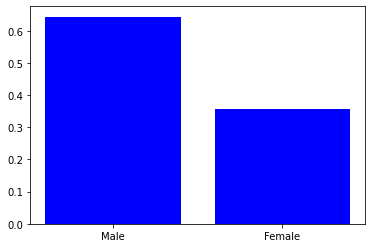

In [19]:
plt.bar(freqs.index, freqs.values, color="blue")
plt.show()

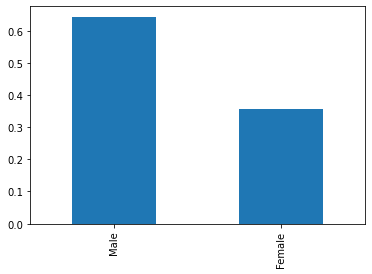

In [20]:
tips.sex.value_counts(normalize=True).plot.bar()
plt.show()

 ## Ques:7 Does the average tip differ by gender? Does one gender tip more than the other? ##

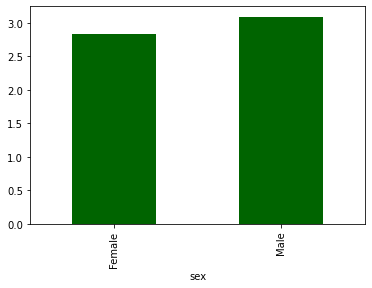

In [24]:
tips.groupby(['sex'])['tip'].mean().plot.bar(color="darkgreen")
plt.show()

 ## Yes, the average tip slightly differs by gender. Male tip slightly more than female ##

 ## Ques:8 Does the average tip differ by the time of day? ##

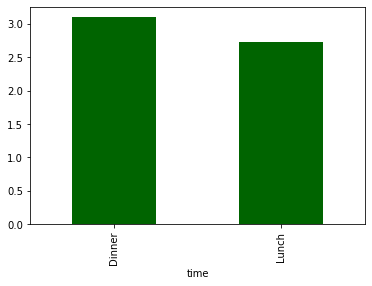

In [25]:
tips.groupby(['time'])['tip'].mean().plot.bar(color="darkgreen")
plt.show()

 ## Yes,people give more tip during Dinner as compared to Lunch ##

 ## Ques:9 Does the average tip differ by size (number of people at the table)? ##

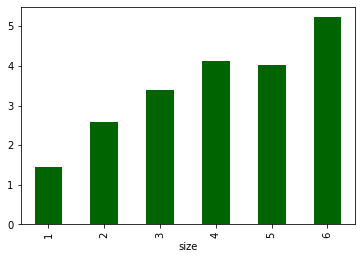

In [27]:
tips.groupby(['size'])['tip'].mean().plot.bar(color="darkgreen")
plt.show()


 ## Yes, more the number of people, higher the tip ##

 ## Ques10: Do smokers tip more than non-smokers? ##

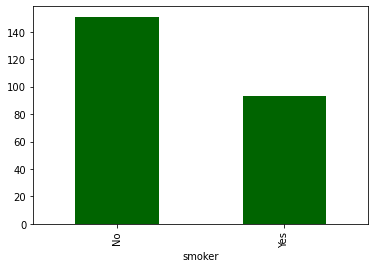

In [28]:
tips.groupby(['smoker'])['tip'].count().plot.bar(color="darkgreen")
plt.show()


 ## No, smokers tip is  less than non-smoker ##

## Ques:11 Gender vs. smoker/non-smoker and tip size - create a 2 by 2 and get the average tip size. Which group tips the most



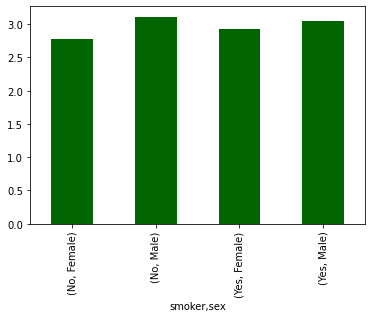

In [29]:
tips.groupby(['smoker','sex'])['tip'].mean().plot.bar(color="darkgreen")
plt.show()

In [30]:
tips.groupby(['smoker','sex'])['tip'].mean().unstack()

sex,Female,Male
smoker,,
No,2.773519,3.113402
Yes,2.931515,3.051167


In [31]:
pd.pivot_table(data=tips, index='sex',columns='smoker',values='tip')

smoker,No,Yes
sex,,
Female,2.773519,2.931515
Male,3.113402,3.051167


In [32]:
pd.pivot_table(data=tips, index='sex',columns='smoker',values='tip',aggfunc=np.median)

smoker,No,Yes
sex,,
Female,2.68,2.88
Male,2.74,3.00


 ## 20th qunatile ##

In [33]:
pd.pivot_table(data=tips, index='sex',columns='smoker',values='tip',aggfunc= lambda x:np.quantile(x,0.2))

smoker,No,Yes
sex,,
Female,1.752,2.0
Male,2.000,2.0


 ## the group with Male and Non-smoker tips the most. Also group with Male and smoker tips slightly less than group with Male non-smoker ##

## Ques:12 Create a new metric called 'pct_tip' = tip/ total_bill - this would be percent tip give, and should be a better measure of the tipping behaviour. ##

In [34]:
tips.insert(2,"pct_tip",tips.tip/tips.total_bill)

In [35]:
tips.head()

,total_bill,tip,pct_tip,sex,smoker,day,time,size
0,16.99,1.01,0.059447,Female,No,Sun,Dinner,2
1,10.34,1.66,0.160542,Male,No,Sun,Dinner,3
2,21.01,3.50,0.166587,Male,No,Sun,Dinner,3
3,23.68,3.31,0.139780,Male,No,Sun,Dinner,2
4,24.59,3.61,0.146808,Female,No,Sun,Dinner,4


 ## Ques:13 Does pct_tip differ by gender? Does one gender tip more than the other? ##

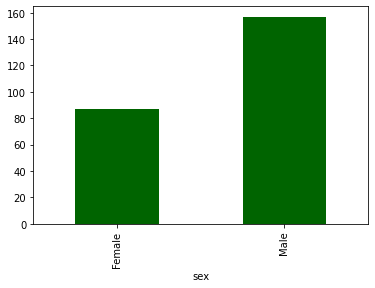

In [36]:
tips.groupby(['sex'])['pct_tip'].count().plot.bar(color="darkgreen")
plt.show()

In [37]:
pd.pivot_table(data=tips, index='sex',columns='smoker',values='pct_tip')

smoker,No,Yes
sex,,
Female,0.156921,0.182150
Male,0.160669,0.152771


 ## Yes, the pct_tip differs by gender. Male tip more than female. ##

 ## Ques:14 Does pct_tip differ by size (number of people at the table)? ##

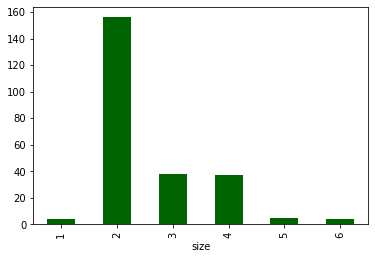

In [38]:
tips.groupby(['size'])['pct_tip'].count().plot.bar(color="darkgreen")
plt.show()

 ## yes, pct_tip do differ by size. The table with size 2 gives maximum pct_tip ##

 ## Ques:15 Make the gender vs. smoker view using pct_tip - does your inference change? ##

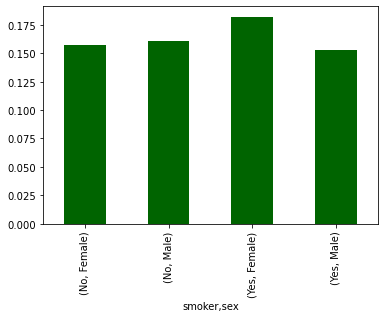

In [40]:
tips.groupby(['smoker','sex'])['pct_tip'].mean().plot.bar(color="darkgreen")
plt.show()

 ## Yes, group with Female smoker gives more average pct_tip ##

 ## Ques:16 Make a scatter plot of total_bill vs. tip ##

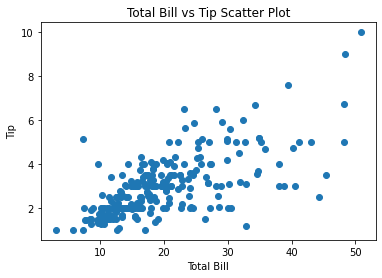

In [41]:
plt.scatter(x='total_bill', y='tip', data = tips)
plt.xlabel('Total Bill')              
plt.ylabel('Tip')
plt.title('Total Bill vs Tip Scatter Plot')            
plt.show()

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

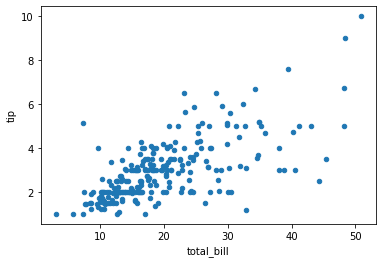

In [42]:
tips.plot.scatter(x='total_bill', y='tip')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

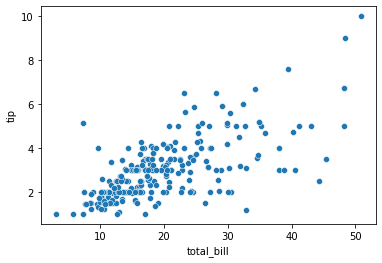

In [43]:
sns.scatterplot(x='total_bill', y='tip', data = tips)

 ## Thus, higher the amount of bill, higher the tip ##

 ## Ques:17 Make a scatter plot of total_bill vs. pct_tip ##

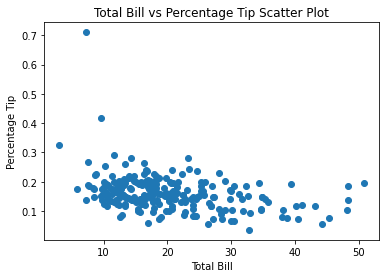

In [44]:
plt.scatter(x='total_bill', y='pct_tip', data = tips)
plt.xlabel('Total Bill')              
plt.ylabel('Percentage Tip')
plt.title('Total Bill vs Percentage Tip Scatter Plot')          
plt.show()

<AxesSubplot:xlabel='total_bill', ylabel='pct_tip'>

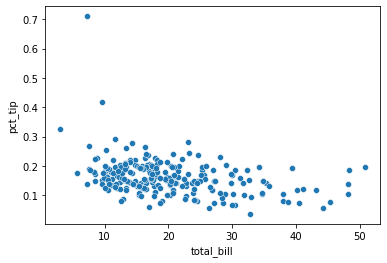

In [45]:
sns.scatterplot(x='total_bill', y='pct_tip', data = tips)

<AxesSubplot:xlabel='total_bill', ylabel='pct_tip'>

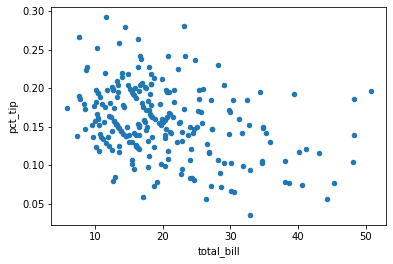

In [46]:
tips[tips.pct_tip<=0.3].plot.scatter(x='total_bill', y='pct_tip')

  ## Thus, higher the amount of bill doesn't make much difference to pct_bill ##